# Analiza meteoritov in kraterjev

## Uvod
V tem dokumentu bomo izvedli analizo podatkov o meteoritih in kraterjih z uporabo podatkov baze Mednarodnega društva za meteorite in planetarno znanost (https://www.lpi.usra.edu/meteor/metbull.php).
Iskali bomo zanimive in uporabne povezave med podatki, ki so navedeni na prej omenjeni povezavi.

## Priprava okolja
Najprej želimo pripraviti okolje, v katerem lahko podatke obdelujemo tako kot hočemo.
To naredimo tako, da uvozimo željene knjižnice, ki nam bodo olajšale delo in pripravimo podatke za obdelavo.

#### Knjižnice
Za obdelavo podatkov in njihov prikaz potrebujemo naslednje knjižnice:

In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib as plt

#### Uvoz podatkov
Uvozimo podatke dobljene iz programa v pandas tabelo:

In [2]:
df = pd.read_json("../data/output.json", precise_float=True)
df.index.names = ["id"]

Tabelo vseh podatkov uredimo po imenih po abecedi, kjer zanemarimo prednost velikih črk pred malimi.
Hkrati pa hočemo stolpec "(Lat,Long)" razdeliti na dva nova stolpca "Latitude" in "Longitude" za lažjo uporabo.
Potem lahko originalnega izbrišemo in stolpce preuredimo kot hočemo.

In [3]:
df = df.sort_values(by="Name", key=lambda c: c.str.lower())
clean_ll_df = df["(Lat,Long)"].dropna()
df[["Latitude", "Longitude"]] = pd.DataFrame(clean_ll_df.to_list(), index=clean_ll_df.index)
col_order = ["Name", "Abbrev", "Status", "Year", "Type", "Mass", "Place",
             "Latitude", "Longitude", "Fall", "Antarctic", "MetBull", "Notes"]
df = df[col_order]

Tabela vseh podatkov:

In [4]:
df

,Name,Abbrev,Status,Year,Type,Mass,Place,Latitude,Longitude,Fall,Antarctic,MetBull,Notes
id,,,,,,,,,,,,,
2,Aachen,NaN,Official,1880.0,L5,21.0,"Nordrhein-Westfalen, Germany",50.775000,6.083330,Y,NaN,78.0,NaN
3,Aammiq,NaN,Official,2000.0,H6,596.0,"Al Biqa', Lebanon",33.700000,35.833330,NaN,NaN,110.0,NaN
4,Aarhus,NaN,Official,1951.0,H6,720.0,"Region Midtjylland, Denmark",56.183330,10.233330,Y,NaN,8.0,NaN
5,Aba,NaN,Pseudo,1927.0,Pseudometeorite,NaN,"Kanto, Japan",35.950000,140.400000,NaN,NaN,NaN,NaN
6,Aba Panu,NaN,Official,2018.0,L3,160000.0,"Oyo, Nigeria",8.282180,3.567140,Yc,NaN,107.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82967,Zomba,NaN,Official,1899.0,L6,7500.0,"Southern, Malawi",-15.183330,35.283330,Y,NaN,NaN,NaN
82968,Zsadany,NaN,Official,1875.0,H5,552.0,"Timis, Romania",45.916666,21.216667,Y,NaN,NaN,NaN
82969,Zubkovsky,NaN,Official,2003.0,L6,2170.0,"Rostovskaya oblast', Russia",49.789170,41.504600,NaN,NaN,89.0,NaN


#### Meteoriti
Ločimo uradne meteorite od ostalih, saj nas zanimajo neketere lastnosti, ki jih imajo le meteoriti.
Stolpec leto spremenimo v tip pd.Int64Dtype(), saj tabela ne vsebuje več kraterjev, ki imajo v stolpcu let podatke z decimalkami.

In [5]:
met_df = df[df["Status"] == "Official"]
met_df = met_df.astype({ "Year": pd.Int64Dtype() })

Tabela vseh uradno priznanih meteoritov:

In [6]:
met_df

,Name,Abbrev,Status,Year,Type,Mass,Place,Latitude,Longitude,Fall,Antarctic,MetBull,Notes
id,,,,,,,,,,,,,
2,Aachen,NaN,Official,1880,L5,21.0,"Nordrhein-Westfalen, Germany",50.775000,6.083330,Y,NaN,78.0,NaN
3,Aammiq,NaN,Official,2000,H6,596.0,"Al Biqa', Lebanon",33.700000,35.833330,NaN,NaN,110.0,NaN
4,Aarhus,NaN,Official,1951,H6,720.0,"Region Midtjylland, Denmark",56.183330,10.233330,Y,NaN,8.0,NaN
6,Aba Panu,NaN,Official,2018,L3,160000.0,"Oyo, Nigeria",8.282180,3.567140,Yc,NaN,107.0,NaN
7,Abadla,NaN,Official,2015,Eucrite-cm,222.0,"Bechar, Algeria",30.936960,-2.715670,NaN,NaN,105.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82967,Zomba,NaN,Official,1899,L6,7500.0,"Southern, Malawi",-15.183330,35.283330,Y,NaN,NaN,NaN
82968,Zsadany,NaN,Official,1875,H5,552.0,"Timis, Romania",45.916666,21.216667,Y,NaN,NaN,NaN
82969,Zubkovsky,NaN,Official,2003,L6,2170.0,"Rostovskaya oblast', Russia",49.789170,41.504600,NaN,NaN,89.0,NaN


#### Kraterji
Ločimo uradne kraterje od ostalih, saj nas zanimajo nekatere lastnosti, ki jih imajo le kraterji.
Prav tako preimenujemo stolpec let v starost, saj so podatki sestavljeni tako, da se starost kraterja vpiše pod leto.

In [7]:
crt_df = df[df["Status"] == "Crater"]
crt_df = crt_df.rename(columns={ "Year": "Age" })

Tabela vseh uradno priznanih kraterjev:

In [8]:
pd.set_option("display.max_rows", 20)
crt_df

,Name,Abbrev,Status,Age,Type,Mass,Place,Latitude,Longitude,Fall,Antarctic,MetBull,Notes
id,,,,,,,,,,,,,
477,Acraman,NaN,Crater,5.900000e+08,Impact Crater,NaN,"South Australia, Australia",-32.016670,135.450000,NaN,NaN,NaN,From EIDB
524,Agoudal [crater],NaN,Crater,1.050000e+05,Impact Crater,NaN,"Centre-South, Morocco",31.983330,-5.500000,NaN,NaN,NaN,From EIDB
2650,Amelia Creek,NaN,Crater,1.640000e+09,Impact Crater,NaN,"Northern Territory, Australia",-20.916667,134.833333,NaN,NaN,NaN,From EIDB
2651,Ames,NaN,Crater,4.700000e+08,Impact Crater,NaN,"Oklahoma, USA",36.250000,-98.200000,NaN,NaN,NaN,From EIDB
2653,Amguid,NaN,Crater,1.000000e+05,Impact Crater,NaN,"Tamanghasset, Algeria",26.087481,4.395056,NaN,NaN,NaN,From EIDB
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69078,Xiuyan,NaN,Crater,5.000000e+04,Impact Crater,NaN,"Liaoning, China",40.350000,123.450000,NaN,NaN,NaN,From EIDB
82824,Yarrabubba,NaN,Crater,2.000000e+09,Impact Crater,NaN,"Western Australia, Australia",-27.166670,118.833330,NaN,NaN,NaN,From EIDB
82933,Zapadnaya,NaN,Crater,1.650000e+08,Impact Crater,NaN,"Zhitomir, Ukraine",49.733330,29.000000,NaN,NaN,NaN,From EIDB


#### Lepši izpis
Napišemo pomožno funkcijo, ki nam polepša izpis tabel.
Podatke in naslove hočemo poravnati na levo, saj jih tako lažje prebermo.
Prav tako se hočemo znebiti stolpca indeksov, saj v večini primerov za prikaz tabele ni potreben.

In [9]:
def pretty_table(table_df):
    styles = [
        dict(selector="th", props=[("text-align", "left")]),
        dict(selector="td", props=[("text-align", "left")])
    ]
    styled_df = table_df.style.set_table_styles(styles)
    return styled_df.hide()

## Deset najboljših

Pogledali si bomo deset najboljših vnosov po naslednjih kriterijih:
* najtežji
* najstarejši
* najpogostejši tip
* najpogostejše leto

#### Deset najtežjih meteoritov
Iz tabele meteoritov izberemo stolpce, ki jih želimo prikazati in dobljene vrstice razvrstimo po masi.
Potem lahko preberemo deset vrhnjih vrstic, kar bo predstavljalo naših deset najtežjih meteoritov.
Na koncu podatke še preoblikujemo v bolj berljivo obliko.

In [10]:
top10_mass = met_df[["Name", "Year", "Place", "Mass"]].sort_values("Mass", ascending=False).head(10)
top10_mass["Mass"] = (top10_mass["Mass"]/10**6).apply(lambda m: f"{m} ton")

Povprečna masa meteorita v gramih:

In [11]:
round(float(met_df["Mass"][met_df["Mass"].notna()].mean()), 3)

9490.823

Povprečen meteorit torej tehta približno 10 kg.

Tabela desetih najtežjih meteoritov, s krajem in letom padca ter maso:

In [12]:
pretty_table(top10_mass)

Name,Year,Place,Mass
Aletai,1898,"Xinjiang, China",74.0 ton
Hoba,1920,"Grootfontein, Namibia",60.0 ton
Cape York,1818,"Nordgronland, Greenland",58.2 ton
Campo del Cielo,1576,"Chaco, Argentina",50.0 ton
Canyon Diablo,1891,"Arizona, USA",30.0 ton
Gibeon,1836,"Namaland, Namibia",26.0 ton
Chupaderos,1852,"Chihuahua, Mexico",24.3 ton
Mundrabilla,1911,"Western Australia, Australia",24.0 ton
Sikhote-Alin,1947,"Primorskiy kray, Russia",23.0 ton
Bacubirito,1863,"Sinaloa, Mexico",22.0 ton


Vidimo, da je zgornja polovica tabele tudi več kot dvakrat težja od spodnje, kar pomeni, da so meteoriti takih velikosti zelo redek pojav.
Le štirje presegajo mejo 50 ton.
Osupljiv je tudi najtežji meteorit, ki tehta približno toliko kot 12 afriških slonov ali 37 dvotonskih avtomobilov.

Našteti meteoriti so torej 2000-krat do 7000-krat težji od povprečnega meteorita.

#### Deset najstarejših meteoritov in kraterjev
Iz tabele meteoritov ali kraterjev izberemo stolpce, ki jih želimo prikazati in dobljene vrstice razvrstimo po letu oziroma starosti.
Potem lahko preberemo deset vrhnjih vrstic, kar bo predstavljalo naših deset najstarejših meteoritov ali kraterjev.
Na koncu podatke še preoblikujemo v bolj berljivo obliko.

In [13]:
top10_met_age = met_df[["Name", "Place", "Year"]].sort_values("Year", ascending=True).head(10)
top10_met_age["Year"] = top10_met_age["Year"].apply(lambda y: f"{abs(y)} pr. n. št." if y < 0 else str(y))

In [14]:
top10_crt_age = crt_df[["Name", "Place", "Age"]].sort_values("Age", ascending=False).head(10)
top10_crt_age["Age"] = (top10_crt_age["Age"]/10**9).apply(lambda a: f"{round(a, 1)} milijard let")

Tabela desetih najstarejših meteoritov, s krajem in letom padca:

In [15]:
pretty_table(top10_met_age)

Name,Place,Year
Ur,"Dhi Qar, Iraq",2500 pr. n. št.
Wietrzno-Bobrka,"Krosno, Poland",600 pr. n. št.
Havana,"Illinois, USA",300 pr. n. št.
Nogata,"Kyushu, Japan",861
Narni,"Umbria, Italy",921
Elbogen,"Karlovarsk, Czech Republic",1400
Rivolta de Bassi,"Lombardia, Italy",1491
Ensisheim,"Alsace, France",1492
Valdinoce,"Emilia-Romagna, Italy",1496
Oliva-Gandia,"Valenciana, Spain",1520


Kot bi lahko predvidevali, nam tabela razkrije, da meteoritov iz tisoč ali več let nazaj ni veliko, saj takrat teh dogodkov niso bili sposobni beležiti tako dobro kot danes.
Vselej pa najdemo kar tri meteorite iz časa pred našim štetjem in pet pred letom 1000.

Tabela desetih najstarejših kraterjev, s krajem in starostjo:

In [16]:
pretty_table(top10_crt_age)

Name,Place,Age
Avak,"Alaska, USA",34.8 milijard let
Suavjrvi,"Respublika Kareliya, Russia",2.4 milijard let
Vredefort,"Free State, South Africa",2.0 milijard let
Yarrabubba,"Western Australia, Australia",2.0 milijard let
Sudbury,"Ontario, Canada",1.9 milijard let
Paasselk,"Mikkeli, Finland",1.8 milijard let
Keurusselk,"Hame, Finland",1.8 milijard let
Dhala,"Madhya Pradesh, India",1.7 milijard let
Amelia Creek,"Northern Territory, Australia",1.6 milijard let
Shoemaker,"Western Australia, Australia",1.6 milijard let


V tabeli očitno odstopa "najstarejši" krater med vsemi, saj je starejši od vesolja samega (po mojem znanju je to nemogoče).
Potrdimo lahko, da je to napaka v podatkovni bazi in ne v naših programih, saj je starost navedena kot 34759 Ma (Ma = mega-annum) ali 34759 milijonov let.

Sicer pa lahko vidimo, da imamo kraterje, ki dosegajo starosti do polovice starosti Zemlje.

#### Deset najpogostejših tipov
V tabeli meteoritov dobimo tabelo pojavitev vseh tipov meteorita, ki je že razvrščena po velikosti.
Iz tega izberemo vrhnjih deset vrstic, kar bo predstavljalo naših deset najpogostejših tipov meteorita.
Tabelo še preoblikujemo tako, da bo prikaz lepši.

In [17]:
top10_types = met_df["Type"].value_counts().head(10)
top10_types = top10_types.to_frame(name="Occurances").reset_index()

Legenda tipov meteoritov, ki so našteti v tabeli (več na: https://en.wikipedia.org/wiki/Chondrite):
* LL\<št.\> - skupina "low-iron, low-metal"
* L\<št.\> - skupina "low-iron"
* H\<št.\> - skupina "high-iron"
* \<št.\> - stopnja homogenosti meteorita

Tabela desetih najpogostejših tipov meteoritov:

In [18]:
pretty_table(top10_types)

Type,Occurances
L6,13041
H5,12011
L5,8970
H6,7008
H4,6554
LL5,3312
LL6,2951
L4,2103
L3,860
H3,718


#### Deset najpogostejših let padca
V tabeli meteoritov dobimo tabelo pojavitev vseh let, ki je že razvrščena po velikosti.
Iz tega izberemo vrhnjih deset vrstic, kar bo predstavljalo naših deset najpogostejših let padca.
Tabelo še preoblikujemo tako, da bo prikaz lepši.

In [19]:
top10_years = met_df["Year"].value_counts().head(10)
top10_years = top10_years.to_frame(name="Amount").reset_index()

Tabela desetih let z največ meteoriti:

In [20]:
pretty_table(top10_years)

Year,Amount
2000,4669
2003,4138
1998,4075
2010,4036
1979,3335
2006,3173
2009,2443
1988,2402
2002,2151
2014,2136


Vidimo, da so leta z največ meteoriti naključna.
Predvidevali bi lahko, da bodo imela poznejša leta več meteoritov zaradi boljših merskih sposobnosti, vendar so leta na seznamu nepovezana in nobeno od njih ni v zadnjem desetletju.

## Grafični prikazi
Pogledali bomo povezave med različnimi spremenljivkami z uporabo grafov.

#### Meteoriti in kraterji skozi čas
Poskusimo narisati grafe števila meteoritov skozi zgodovino.
Zaradi ponavljanja prehodno naredimo funkcijo, kateri podamo željene pogoje za risanje grafa.

In [21]:
def get_met_counts_min_year(min_year, decades=False):
    col_min_year = met_df[met_df["Year"] >= min_year]["Year"]

    if decades:
        col_min_year = (col_min_year//10)*10

    return col_min_year.value_counts().sort_index()

Graf števila padlih meteoritov v desetletju od leta 1700 dalje:

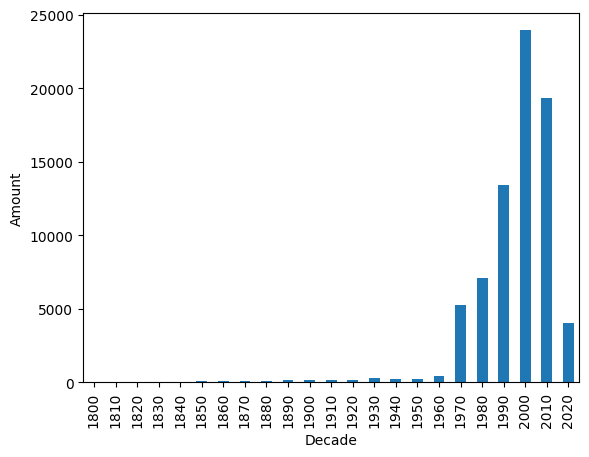

In [22]:
get_met_counts_min_year(1800, decades=True).plot.bar(xlabel="Decade", ylabel="Amount");

Očitno je, da so skoraj vsi meteoriti v podatkovni bazi iz zadnjih 50 let, zato moramo časovno obdobje skrajšati, da dobimo boljšo predstavo.

Graf števila padlih meteoritov v desetletju od leta 1950 dalje:

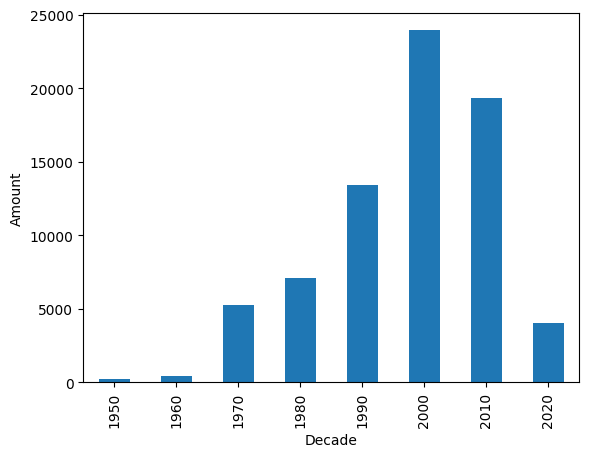

In [23]:
get_met_counts_min_year(1950, decades=True).plot.bar(xlabel="Decade", ylabel="Amount");

Graf števila padlih meteoritov v letu od leta 1950 dalje:

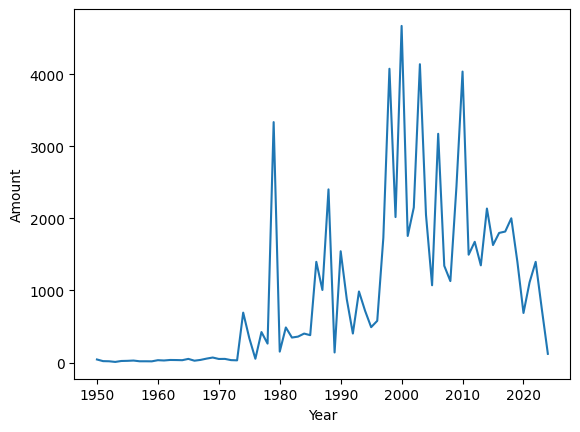

In [24]:
get_met_counts_min_year(1950, decades=False).plot(ylabel="Amount");

Podatki delujejo zelo naključni, z zelo velikimi skoki in padci iz leta v leto.
To bi lahko bila posledica, da ob prodoru meteorja v atmosfero ta ponavadi razpade na več manjših.
Torej bi lahko ob padcu velikega meteorita, ki se razbije na tisoče delov graf močno poskočil.

Ko pogledamo graf po desetletjih, zgleda ta že manj naključen, vendar še vedno vidimo velike razlike med desetletji.

Če želimo obravnavati še kraterje, je potrebno prvo izločiti "najstarejši" krater, za keterega smo v prejšnjem poglavju odkrili, da je napaka v podatkovni bazi.
Namesto, da ga odstranimo iz tabele, lahko najdemo raje naslednji najstarejši krater in tvorimo intervale po 200 milijonov let do njegove starosti.
Potem vnosom v tabeli pripišemo interval in za konec intervale še preimenujemo, da se pojavijo lepše na grafu.

In [25]:
real_max = crt_df.drop(crt_df["Age"].idxmax())["Age"].max()
intervals = pd.interval_range(start=0, end=real_max, freq=2*10**8, closed="left")
col_interval = pd.cut(crt_df["Age"], bins=intervals, include_lowest=True).dropna()
col_interval_trans = col_interval.apply(lambda i: f"{int(i.left/10**6)} mil.")

Graf števila kraterjev glede na starost:

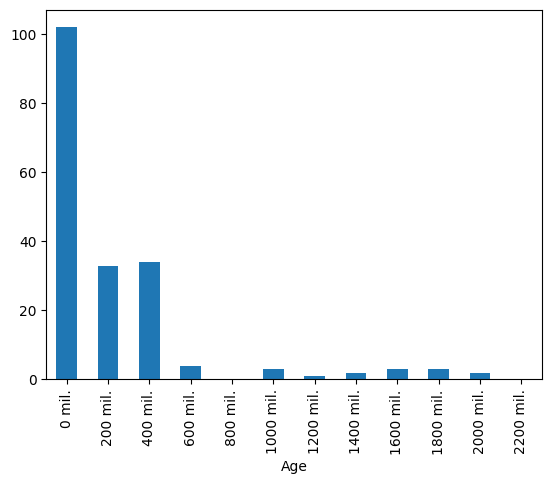

In [26]:
col_interval_trans.value_counts().sort_index().plot.bar();

Očitno je, da se skoraj vsi kraterji nahajajo v starostnem razredu do 600 milijonov let.
To je logično, saj starejše kot so naravne značilnosti, večje so možnosti, da so te do sedaj že izginile.

#### Povezave z maso meteorita
Pogledali si bomo še različne povezave med maso meteorita in različnimi faktorji, ki bi nanjo lahko vplivali.
Sprva si lahko pogledamo graf povprečne mase meteorita skozi leta, da vidimo, če najdemo velika odstopanja od povprečja.

Dobimo ga tako, da sprva tabelo omejimo na časovno obdobje, kjer imamo več vnosov (npr. po 1900) in na podatke, ki nas zanimajo, tj. leto in masa.
Potem lahko združimo vrstice glede na leto padca in izračunamo povprečno vrednost mase.
Te podatke potem še pretvorimo v enote, ki nam najbolje pokažejo vrednosti, v tem primeru kilograme.

In [27]:
mean_mass_year = met_df[met_df["Year"] > 1900][["Year", "Mass"]].groupby("Year").mean()/10**3

Graf povprečne mase meteorita skozi leta:

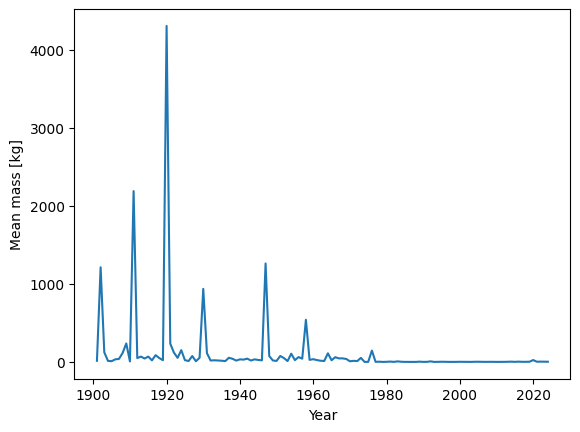

In [28]:
mean_mass_year.plot(legend=False, ylabel="Mean mass [kg]");

Opazimo gromozanske skoke v povprečni masi meteorita.
Te podatke lahko primerjamo s prej dobljeno tabelo najtežjih meteoritov.

Tabela desetih najtežjih meteoritov za primerjavo:

In [29]:
pretty_table(top10_mass)

Name,Year,Place,Mass
Aletai,1898,"Xinjiang, China",74.0 ton
Hoba,1920,"Grootfontein, Namibia",60.0 ton
Cape York,1818,"Nordgronland, Greenland",58.2 ton
Campo del Cielo,1576,"Chaco, Argentina",50.0 ton
Canyon Diablo,1891,"Arizona, USA",30.0 ton
Gibeon,1836,"Namaland, Namibia",26.0 ton
Chupaderos,1852,"Chihuahua, Mexico",24.3 ton
Mundrabilla,1911,"Western Australia, Australia",24.0 ton
Sikhote-Alin,1947,"Primorskiy kray, Russia",23.0 ton
Bacubirito,1863,"Sinaloa, Mexico",22.0 ton


Opazimo lahko močno korelacijo, saj so leta 1911, 1920 in 1947 hkrati leta z vrhunci povprečne mase in leta, ko je padel eden od desetih najtežjih meteoritov.
Predvsem odstopa leto 1920, zato si podrobneje poglejmo meteorite, ki so padli takrat.

Tabelo omejimo na leto 1920 in na stolpce, ki nas zanimajo.
Potem jo razvrstimo po masi in pretvorimo ter dodamo enote za lepši izgled.

In [30]:
met_1920_df = met_df[met_df["Year"] == 1920][["Name", "Year", "Mass"]].sort_values("Mass", ascending=False)
met_1920_df["Mass"] = (met_1920_df["Mass"]/10**3).apply(lambda m: f"{round(m, 1)} kg")

Tabela vseh meteoritov leta 1920, razvrščena po masi:

In [31]:
pretty_table(met_1920_df)

Name,Year,Mass
Hoba,1920,60000.0 kg
Unter-Mssing,1920,80.0 kg
Merua,1920,71.4 kg
Wu-chu-mu-ch'in,1920,68.9 kg
Mayodan,1920,15.4 kg
Kushiike,1920,4.5 kg
Chinguetti,1920,4.0 kg
Witchelina,1920,3.6 kg
San Francisco Mountains,1920,1.7 kg
Aguila Blanca,1920,1.4 kg


Vidimo, da je to leto, ko je padel drugi najtežji zabeležen meteorit in hkrati zelo malo drugih, lažjih meteoritov.
Posledica tega je, da najtežji meteorit zelo močno vpliva na povprečno maso.
To obrazloži vrh, ki smo ga videli na grafu in je verjetno razlog za vse podobne vrhove.

Naslednje si lahko pogledamo povezavo med maso in tipom meteorita, da vidimo katere vrste meteorita so najtežje.

To storimo podobno kot prej, kjer tabelo meteoritov omejimo na tip in maso in združimo vrstice glede na tip meteorita.
Iz tega razberemo povprečne vrednosti mas in jih pretvorimo v kilograme.
Pri risanju pa izberemo samo 20 največjih povprečnih mas, saj imamo tipov meteoritov preveč za en graf.

In [32]:
mean_mass_type = met_df[["Type", "Mass"]].groupby("Type").mean()/10**3

Graf dvajsetih tipov z največjo povprečno maso na tip:

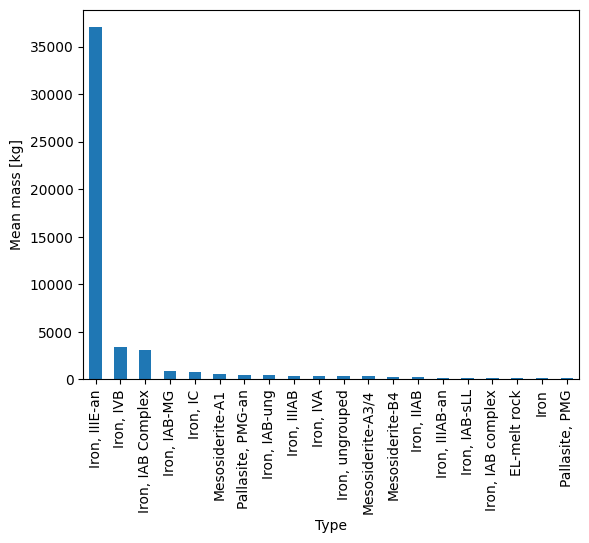

In [33]:
mean_mass_type.sort_values("Mass", ascending=False).head(20).plot.bar(legend=False, ylabel="Mean mass [kg]");

Tukaj mogočno prevlada en tip meteorita "Iron, IIIE-an", kateremu z mnogo manjšima povprečnima masama sledita "Iron, IVB" in "Iron, IAB Complex".
Ostali tipi meteoritov pa v primerjavi s temi skoraj ne obstajajo.

Pogledamo lahko meteorite s temi tremi tipi in odkrijemo zakaj tako močno odstopajo.
Napišemo pomožno funkcijo, ki vrne tabelo vseh meteoritov nekega tipa, urejeno po masi in zapisano v kilogramih.

In [34]:
def get_table_of_type(met_type):
    met_type_df = met_df[met_df["Type"] == met_type][["Name", "Type", "Mass"]].sort_values("Mass", ascending=False)
    met_type_df["Mass"] = (met_type_df["Mass"]/10**3).apply(lambda m: f"{round(m, 2)} kg")
    return met_type_df

Tabela vseh meteoritov tipa "Iron, IIIE-an" urejena po masi:

In [35]:
pretty_table(get_table_of_type("Iron, IIIE-an"))

Name,Type,Mass
Aletai,"Iron, IIIE-an",74000.0 kg
Aliskerovo,"Iron, IIIE-an",58.4 kg


Tabela vseh meteoritov tipa "Iron, IVB" urejena po masi:

In [36]:
pretty_table(get_table_of_type("Iron, IVB"))

Name,Type,Mass
Hoba,"Iron, IVB",60000.0 kg
Oiuru 001,"Iron, IVB",450.0 kg
Cape of Good Hope,"Iron, IVB",136.0 kg
Tawallah Valley,"Iron, IVB",75.75 kg
Tlacotepec,"Iron, IVB",71.0 kg
Santa Clara,"Iron, IVB",63.0 kg
Warburton Range,"Iron, IVB",56.93 kg
Weaver Mountains,"Iron, IVB",38.8 kg
Dumont,"Iron, IVB",27.42 kg
Skookum,"Iron, IVB",16.0 kg


Tabela vseh meteoritov tipa "Iron, IAB Complex" urejena po masi:

In [37]:
pretty_table(get_table_of_type("Iron, IAB Complex"))

Name,Type,Mass
El Ali,"Iron, IAB Complex",15200.0 kg
Northwest Africa 14956,"Iron, IAB Complex",0.21 kg
Northwest Africa 8443,"Iron, IAB Complex",0.16 kg
Northwest Africa 15115,"Iron, IAB Complex",0.13 kg
Northwest Africa 14961,"Iron, IAB Complex",0.04 kg


Takoj lahko opazimo zakaj je prišlo do takšnih odstopanj.
To so tipi najtežjih meteoritov, ki so zelo nepogosti.
To pomeni, da bo povprečna masa bila odvisna večinoma samo od najtežjega meteorita zaradi gromozanske razlike v teži in majhne količine normalno velikih meteoritov.

## Zemljevidi
Uporabimo lahko tudi podatke o lokacijah, ki jih imamo shranjene v tabelah.
Pred tem moramo pa pripraviti okolje za risanje zemljevidov.

Uvozimo zemljevide iz lokalno shranjenih datotek z uporabo geopandas.
Poskrbeti moramo tudi, da se v novi tabeli meteoritov ne pojavijo vnosi, ki niso na Zemlji, saj ne želimo risati meteoritov na drugih planetih.

In [38]:
world_gdf = gpd.read_file("world.zip")
world_accurate_gdf = gpd.read_file("world-accurate.zip")
earth_met_df = met_df[(met_df["Place"] != "Mars") & (met_df["Place"] != "Moon")]

Na koncu to pretvorimo v geopandas tabelo z uporabo "Latitude" in "Longitude" stolpcev.

In [39]:
met_gdf = gpd.GeoDataFrame(earth_met_df, geometry=gpd.points_from_xy(earth_met_df["Longitude"], earth_met_df["Latitude"]), crs="EPSG:4326")

In [40]:
crt_gdf = gpd.GeoDataFrame(crt_df, geometry=gpd.points_from_xy(crt_df["Longitude"], crt_df["Latitude"]), crs="EPSG:4326")

Za začetek naredimo pomožne funkcije, ki nam bodo olajšale delo pri risanju zemljevidov.
Eno funkcijo, ki doda opis osi in drugo, ki nariše zemljevid sveta, na katerega bomo potem vrisali podatke.

In [41]:
def set_labels(ax):
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")

In [42]:
def get_world_map():
    ax = world_gdf.plot(color="white", edgecolor="black")
    set_labels(ax)
    return ax

#### Vsi meteoriti in kraterji
Prvo si bomo pogledali kako izgledajo naši padci meteoritov in kraterji na svetovnem zemljevidu.

Zemljevid vseh meteoritov:

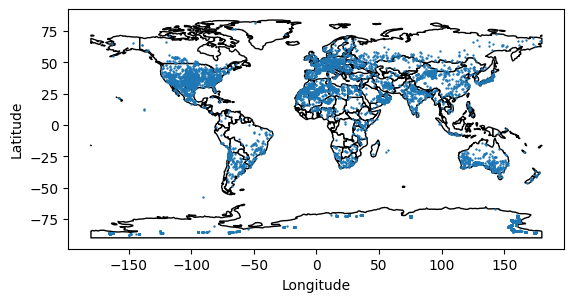

In [43]:
met_gdf.plot(ax=get_world_map(), markersize=0.5);

Iz števila pikic bi z lahkoto sklepali na območja z največjim šetvilom padcev meteoritov, vendar kot bomo videli v prihodnje pri analizi glede na državo ta zemljevid ne pove celotne zgodbe.
Veliko meteoritov na enem območju se z lahkoto skrije pred našimi očmi.

Zemljevid vseh kraterjev:

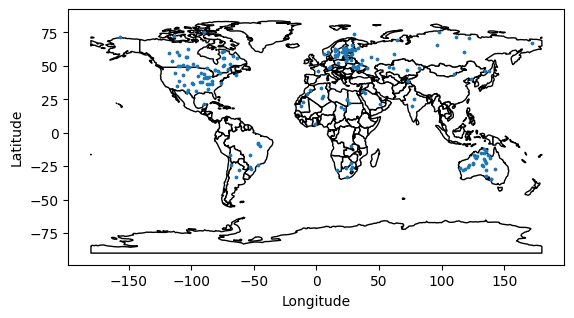

In [44]:
crt_gdf.plot(ax=get_world_map(), markersize=3);

Pri obeh zemljevidih lahko opazimo, da je največja gostota ravno na najbolje poseljenih območjih sveta.
Severna območja kot so Kanada, Grenlandija, Sibirija in težko dostopna območja kot so džungle in puščave pa so bolj prazna.

#### Glede na državo
Poskusimo lahko podatke narisati tudi glede na državo padca.
Za to bomo potrebovali vedeti kam je meteorit padel oziroma kje se krater nahaja.

Zaradi nekonstantnosti stolpca "Place", iz tega ne moremo dobiti države padca.
Lahko pa točke padcev presekamo z natančnim zemljevidom sveta, da ugotovimo v katero državo je padel.
S tem bomo dobili novo tabelo samo kraterjev in meteoritov, ki so pristali na kopnem v državi, skupaj z državo kjer so pristali.
Na žalost pa so te operacije za velike količine podatkov zelo počasne, vendar se za točnost podatkov splača potrpeti.

In [45]:
met_country_gdf = gpd.overlay(met_gdf, world_accurate_gdf, how="intersection")
met_country_gdf = met_country_gdf.rename(columns={ "ADMIN": "Country" })

In [46]:
crt_country_gdf = gpd.overlay(crt_gdf, world_accurate_gdf, how="intersection")
crt_country_gdf = crt_country_gdf.rename(columns={ "ADMIN": "Country" })

Sedaj lahko naredimo novo tabelo z istimi podatki kot tabela vseh držav, le z dodanima stolpcema števila meteoritov in kraterjev.

In [47]:
world_extra_gdf = world_gdf.set_index("admin")
world_extra_gdf["Meteorites"] = met_country_gdf["Country"].value_counts()
world_extra_gdf["Craters"] = crt_country_gdf["Country"].value_counts()
world_extra_gdf = world_extra_gdf.reset_index(names="Country")

Napišemo pomožno funkcijo, da nam ni potrebno vsakič dajati istih parametrov:

In [48]:
def draw_map(gdf, column):
    set_labels(gdf.plot(
        column=column,
        legend=True,
        legend_kwds={ "orientation": "horizontal" },
        missing_kwds={
            "color": "lightgrey",
        }
    ))

Zemljevid števila meteoritov na državo:

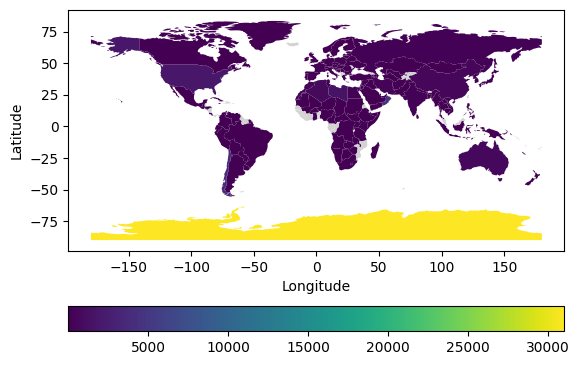

In [49]:
draw_map(world_extra_gdf, "Meteorites")

Vidimo, da je v nasprotju z našimi pričakovanji, ki jih je postavil zemljevid vseh meteoritov na svetovnem zemljevidu, skoraj cel svet zanemarljiv v primerjavi z Antarktiko.
Tam je bilo najdenih več kot 30000 meteoritov, kar je zelo blizu številu vseh meteoritov, ki smo jih dobili z analizo države padca.

Število vseh meteoritov, za katere smo določili državo padca:

In [50]:
len(met_country_gdf)

47841

Izven Antarktike je po celem svetu le polovica toliko meteoritov kot na Antarktiki sami.
Zato lahko poskusimo narisati še svet brez Antarktike.

Zemljevid števila meteoritov na državo brez Antarktike:

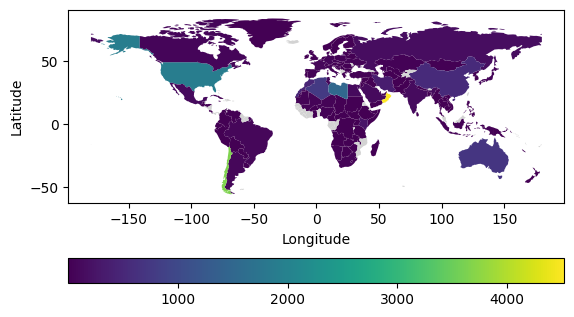

In [51]:
draw_map(world_extra_gdf[world_extra_gdf["Country"] != "Antarctica"], "Meteorites")

Tudi brez Antarktike prevladuje zelo majhno število držav.
Poglejmo si katere države to so.

Izberemo stolpce, ki jih želimo prikazati in jih razvrstimo po številu meteoritov.
Vzamemo vrhnjih deset držav in na koncu še zapišemo števila meteoritov kot cela števila.

In [52]:
top10_countries_met = world_extra_gdf[["Country", "Meteorites"]].sort_values("Meteorites", ascending=False).head(10)
top10_countries_met = top10_countries_met.astype({ "Meteorites": int })

Tabela desetih držav z največ meteoriti:

In [53]:
pretty_table(top10_countries_met)

Country,Meteorites
Antarctica,31058
Oman,4526
Chile,3643
United States of America,1906
Libya,1515
Algeria,773
Australia,694
China,536
Morocco,471
Iran,364


Tabela in zemljevid nam potrdita, da je največ meteoritov zapisanih kot padlih na Antarktiki.
Sledijo Oman, Čile, Združene države Amerike in Libija.
Vse ostale države pa imajo pod 1000 meteoritov.

Poglejmo si še kako izgleda zemljevid kraterjev.

Zemljevid števila kraterjev na državo:

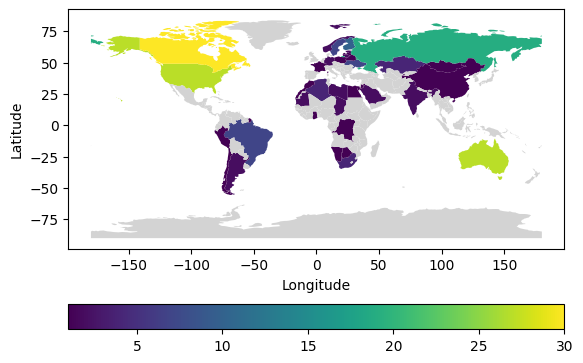

In [54]:
draw_map(world_extra_gdf, "Craters")

Tukaj je bolj očitno katere države prevladujejo, vendar lahko vseeno pogledamo tabelo desetih držav z največ kraterji.

Izberemo stolpce, ki jih želimo prikazati in jih razvrstimo po številu kraterjev.
Vzamemo vrhnjih deset držav in na koncu še zapišemo števila kraterjev kot cela števila.

In [55]:
top10_countries_crt = world_extra_gdf[["Country", "Craters"]].sort_values("Craters", ascending=False).head(10)
top10_countries_crt = top10_countries_crt.astype({ "Craters": int })

Tabela desetih držav z največ meteoriti:

In [56]:
pretty_table(top10_countries_crt)

Country,Craters
Canada,30
United States of America,27
Australia,27
Russia,19
Finland,10
Ukraine,7
Sweden,7
Brazil,7
South Africa,4
Algeria,4


Kot je razvidno iz zemljevida so države z največ kraterji Kanada, Združene države Amerike, Avstralija in Rusija.
Mogoče presenetljivo pa vidimo, da je naslednja Finska, ki je mnogokrat manjša od prej naštetih držav, a z njimi vseeno konkurira.

Za zaključek pa si poglejmo še povprečno maso meteorita glede na državo padca, da vidimo, če opazimo kakšna odstopanja.

Tabeli držav dodamo stolpec povprečne mase meteorita.

In [57]:
world_extra_gdf = world_extra_gdf.set_index("Country")
world_extra_gdf["Mean meteorite mass"] = met_country_gdf[["Country", "Mass"]].groupby("Country").mean()/10**3
world_extra_gdf = world_extra_gdf.reset_index()

Zemljevid povprečne mase meteorita na državo v kg:

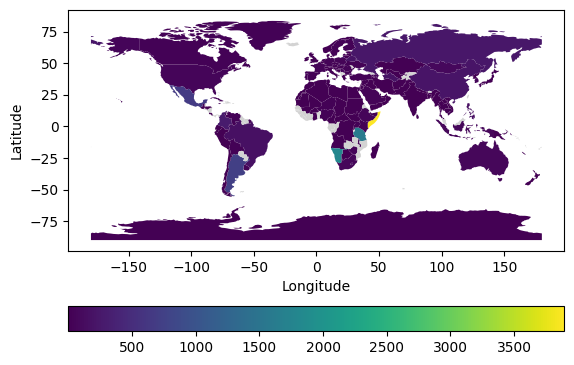

In [58]:
draw_map(world_extra_gdf, "Mean meteorite mass")

Že takoj vidimo, da so močna odstopanja, zato si poglejmo še tabelo desetih najvišjih vrednosti.

Izberemo stolpce, ki jih želimo prikazati in jih razvrstimo po povprečni masi meteorita.
Vzamemo vrhnjih deset držav in na koncu še zapišemo povprečno maso meteorita v lepšem formatu, z enoto.

In [59]:
top10_countries_mass = world_extra_gdf[["Country", "Mean meteorite mass"]].sort_values("Mean meteorite mass", ascending=False).head(10)
top10_countries_mass["Mean meteorite mass"] = top10_countries_mass["Mean meteorite mass"].apply(lambda m: f"{round(m, 1)} kg")

Tabela desetih držav z najvišjo povprečno maso meteorita:

In [60]:
pretty_table(top10_countries_mass)

Country,Mean meteorite mass
Somalia,3894.7 kg
Namibia,1798.5 kg
United Republic of Tanzania,1601.6 kg
Argentina,728.6 kg
Mexico,671.5 kg
Colombia,276.4 kg
Russia,239.2 kg
China,203.0 kg
Belarus,189.4 kg
Turkmenistan,185.3 kg


Imamo tri države, ki močno prevladujejo nad ostalimi.
To so Somalija, Namibija in Tanzanija.
Pogledamo si lahko tabele meteoritov, ki so padli na ozemlje teh držav, da bomo lažje ugotovili zakaj točno te prevladujejo.

Naredimo novo tabelo z stolpci, ki jih hočemo prikazati in že na začetku razvrstimo po masi.
Potem stolpec mase polepšamo s pretvorbo enot in dodatkom enote.
Na koncu pa vsaki državi priredimo svojo tabelo, ki vsebuje samo elemente, ki so iz te države.

In [61]:
mass_sorted_df = met_country_gdf[["Name", "Country", "Mass"]].sort_values("Mass", ascending=False)
mass_sorted_df["Mass"] = (mass_sorted_df["Mass"]/10**3).apply(lambda m: f"{round(m, 1)} kg")

In [62]:
somalia_df = mass_sorted_df[mass_sorted_df["Country"] == "Somalia"]

In [63]:
namibia_df = mass_sorted_df[mass_sorted_df["Country"] == "Namibia"]

In [64]:
tanzania_df = mass_sorted_df[mass_sorted_df["Country"] == "United Republic of Tanzania"]

Tabela vseh meteoritov Somalije, urejena po masi:

In [65]:
pretty_table(somalia_df)

Name,Country,Mass
El Ali,Somalia,15200.0 kg
Uegit,Somalia,252.0 kg
Bur-Gheluai,Somalia,120.0 kg
Bosaso,Somalia,6.9 kg


Tabela desetih najtežjih meteoritov Namibije, urejena po masi:

In [66]:
pretty_table(namibia_df.head(10))

Name,Country,Mass
Hoba,Namibia,60000.0 kg
Gibeon,Namibia,26000.0 kg
Korra Korrabes,Namibia,140.0 kg
Etosha,Namibia,110.7 kg
Gobabeb,Namibia,27.0 kg
Maltahhe,Namibia,22.3 kg
Karasburg,Namibia,12.0 kg
Okahandja,Namibia,6.6 kg
Asab,Namibia,1.5 kg
Rooikop 001,Namibia,1.0 kg


Tabela vseh meteoritov Tanzanije, urejena po masi:

In [67]:
pretty_table(tanzania_df)

Name,Country,Mass
Mbosi,United Republic of Tanzania,16000.0 kg
Rupota,United Republic of Tanzania,6.0 kg
Chela,United Republic of Tanzania,2.9 kg
Ngare Sero,United Republic of Tanzania,2.2 kg
Karatu,United Republic of Tanzania,2.2 kg
Ishinga,United Republic of Tanzania,1.3 kg
Ivuna,United Republic of Tanzania,0.7 kg
Malampaka,United Republic of Tanzania,0.5 kg
Ufana,United Republic of Tanzania,0.2 kg
Peramiho,United Republic of Tanzania,0.2 kg


Naleteli smo na isto težavo kot pri grafičnih prikazih.
Močno odstopanje teh treh držav je povzročil padec treh zelo težkih meteoritov, ki se uvrščajo med ene najtežjih na svetu.
Manjše kot povprečno število meteoritov v teh državah pa vodi v močno prevladovanje teh najtežjih meteoritov pri izračunu povprečne mase.

## Zaključek
Videli smo torej različne zanimivosti o meteoritih in kraterjih kot so najtežji, najstarejši in najpogostejši meteoriti in kraterji.
Različna področja smo analizirali tudi tako, da smo iskali povezave med spremenljivkami.
Recimo število meteoritov skozi leta, povprečna masa meteorita skozi leta in še več.
Končali pa smo še z geografsko analizo in prikazom, kjer smo obravnavali število meteoritov na državo in povprečno maso meteorita na državo ter drugo.

Odkrili smo, da je večina meteoritov iz zadnjih 50 let, da je največ meteoritov padlo leta 2000 in desetletja 2000-2010, da je večina kraterjev starih manj kot 600 milijonov let in še veliko več.
Pri analizi mase pa so nam vedno pred oči skakali podatki v povezavi z najtežjimi meteoriti.
Recimo leta, ko je bila povprečna masa meteorita največja so bila ravno ta, ko je padel eden izdem najtežjih meteoritov.
Tip meteorita z najvišjo povprečno maso je bil tip enega izmed najtežjih meteoritov in države z najvišjo povprečno maso meteoritov so bile ravno tiste, v katere je padel eden takih meteoritov.

Podatki in rezultati, ki smo jih dobili so zanimivi, ampak ali so uporabni je pa druga zgodba.
Med analizo smo odkrili meteorit starejši od vesolja samega, ki je bil posledica napake v podatkovni bazi, zato ne moremo garantirati pravilnosti vseh podatkov.
Lahko se še kje skriva napaka takšne vrste, le tokrat malo manj očitna.
Je pa smešna ideje meteorita, dvakrat starejšega od vesolja, zato je tudi to nekaj vredno.